# Declare and read data

In [2]:
import chardet

with open('fraudTrain.csv', 'rb') as f:
    train = chardet.detect(f.read(10000))
    print(train)
with open('fraudTest.csv', 'rb') as f:
    test = chardet.detect(f.read(10000))
    print(test)


{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [3]:
import pandas as pd
# Đọc tệp với mã hóa ascii
train = pd.read_csv('fraudTrain.csv', encoding='ascii')
test = pd.read_csv('fraudTest.csv', encoding='ascii')

# EDA

## Basic EDA

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

def dataoverview(df, message):
    print(f'{message}:')
    print('\nInfo: ')
    print(df.info())
    print('\nDescribe: ')
    print(df.describe())
    print('\nRows: ', df.shape[0])
    print('\nNumber of features: ', df.shape[1])
    print('\nFeatures: ')
    print(df.columns.tolist())
    print('\nMissing values: ', df.isnull().sum().values.sum())
    print('\nUnique values: ')
    print(df.nunique())
    dups = df.duplicated()
    print("Duplicate Rows",df[dups])
    plt.figure(figsize=(10,12))
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

A Overview about the train dataset:

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    12966

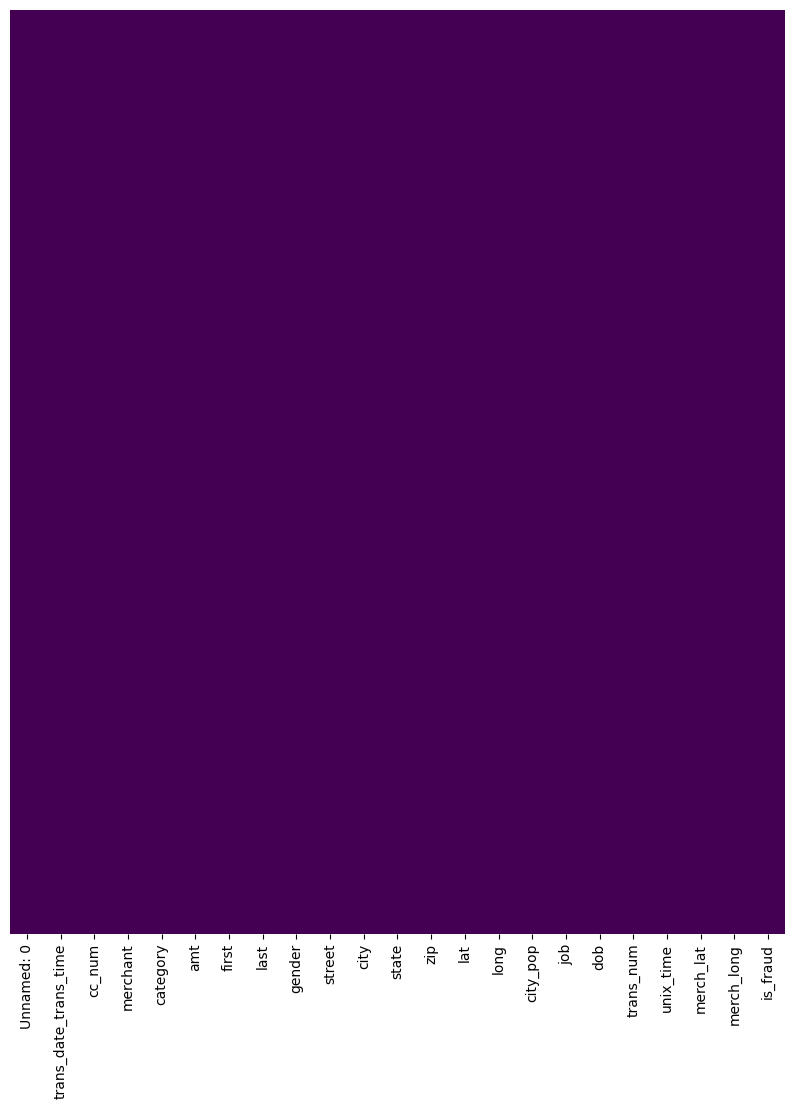

In [7]:
dataoverview(train, 'A Overview about the train dataset')

A Overview about the test dataset:

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float6

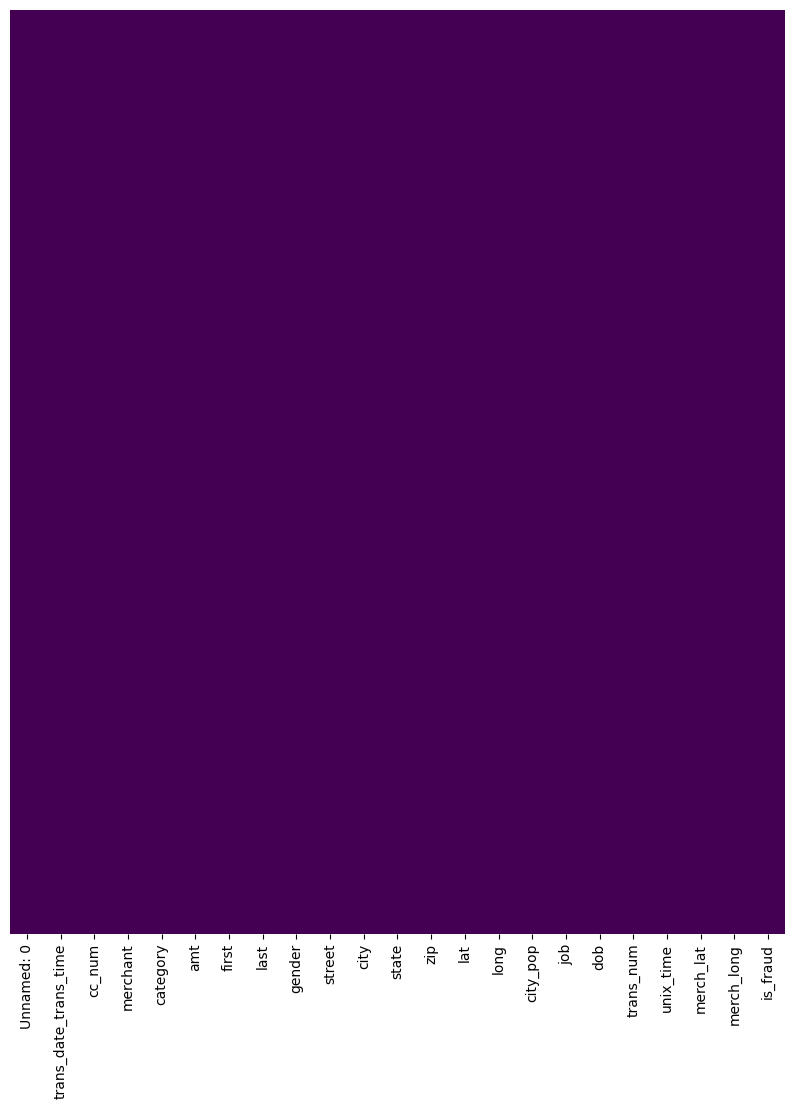

In [8]:
dataoverview(test, 'A Overview about the test dataset')

# Clean data

In [10]:
train = train.drop(train.columns[0], axis=1)
test = test.drop(test.columns[0], axis=1)

## Save data

In [12]:
train.to_csv('train_cleaned.csv', index=False)
test.to_csv('test_cleaned.csv', index=False)